## Importing Libraries

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [14, 6]
sns.set(style="whitegrid")

## Importing data

In [3]:
DATA_SOURCE = "/Users/mac/Desktop/DSTI_Project/Machine_Learning/Project 2/archive/"

In [4]:
orders = pd.read_csv(DATA_SOURCE + "orders.csv")
order_products_train = pd.read_csv(DATA_SOURCE + "order_products__train.csv")
order_products_prior = pd.read_csv(DATA_SOURCE + "order_products__prior.csv")
products = pd.read_csv(DATA_SOURCE + "products.csv")
departments = pd.read_csv(DATA_SOURCE + "departments.csv")
aisles = pd.read_csv(DATA_SOURCE + "aisles.csv")

## Input data

In [5]:
max_len = 2
list_department_id = [4, 16, 5, 8]
list_aisle_id = []

## Prepocessing the data

In [6]:
df_check = order_products_prior.merge(order_products_train, on = "order_id", how = "inner")

In [7]:
# check if order_products_prior has the same data with order_products_train or not

In [8]:
df_check.head()

,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_id_y,add_to_cart_order_y,reordered_y


In [9]:
# df_check returns nothing, so we can use the data of both order_products_prior and order_products_train

In [10]:
order_products = pd.concat([order_products_train, order_products_prior])

In [11]:
data = order_products.merge(products, on = "product_id", how = "left")

In [12]:
data = data.merge(aisles, on = "aisle_id", how = "left")

In [13]:
data = data.merge(departments, on = "department_id", how = "left")

In [14]:
data = data.merge(orders, on = "order_id", how = "left")

In [15]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


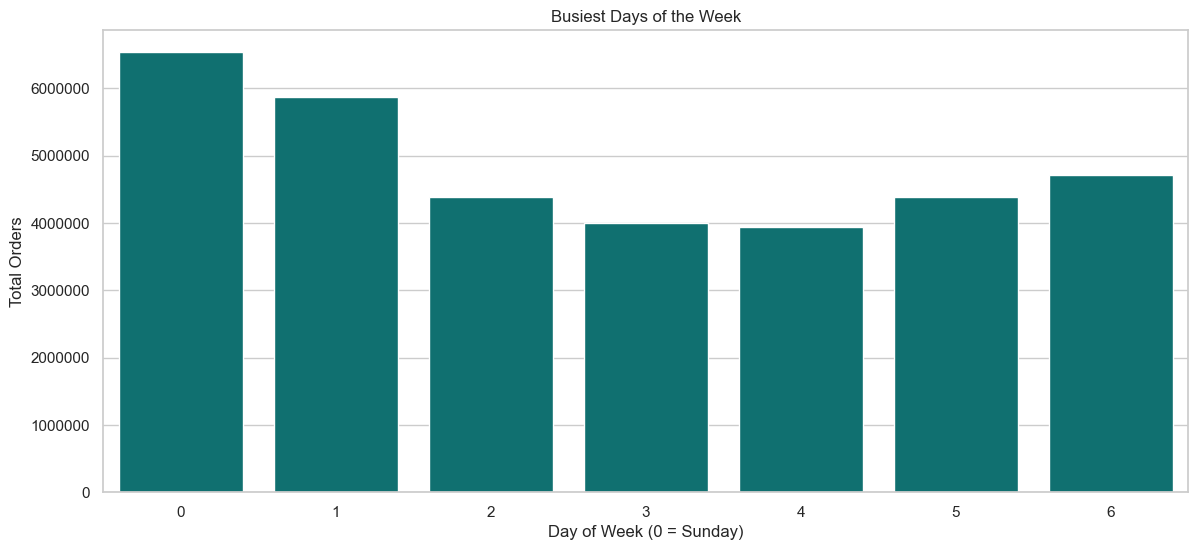

In [16]:
sns.countplot(x='order_dow', data = data, color='teal')
plt.title('Busiest Days of the Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Total Orders')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

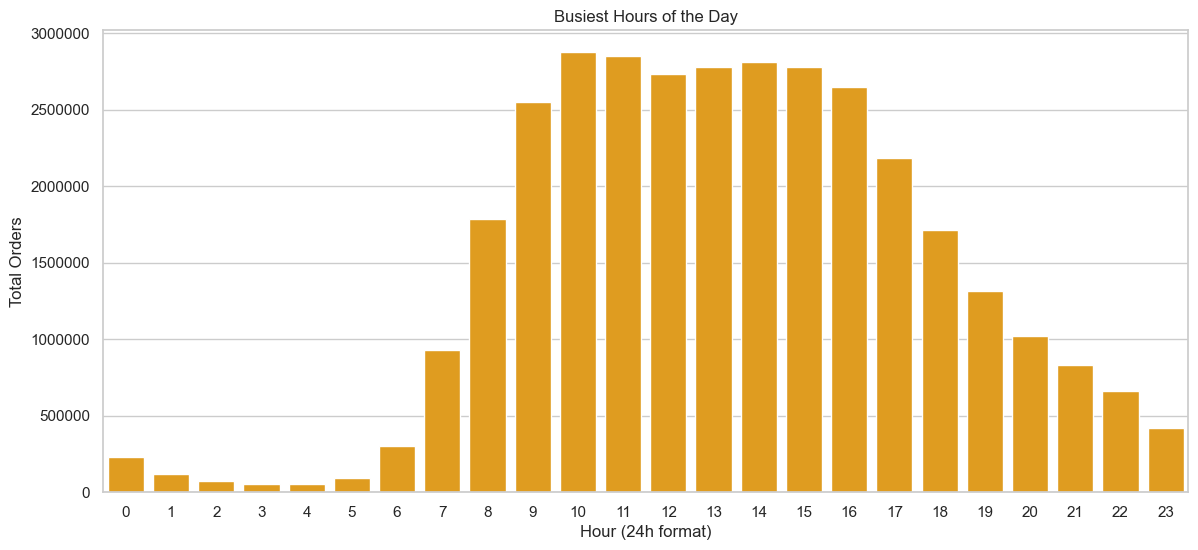

In [17]:
# 2. Orders by Hour of Day
sns.countplot(x='order_hour_of_day', data=data, color='orange')
plt.title('Busiest Hours of the Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Total Orders')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

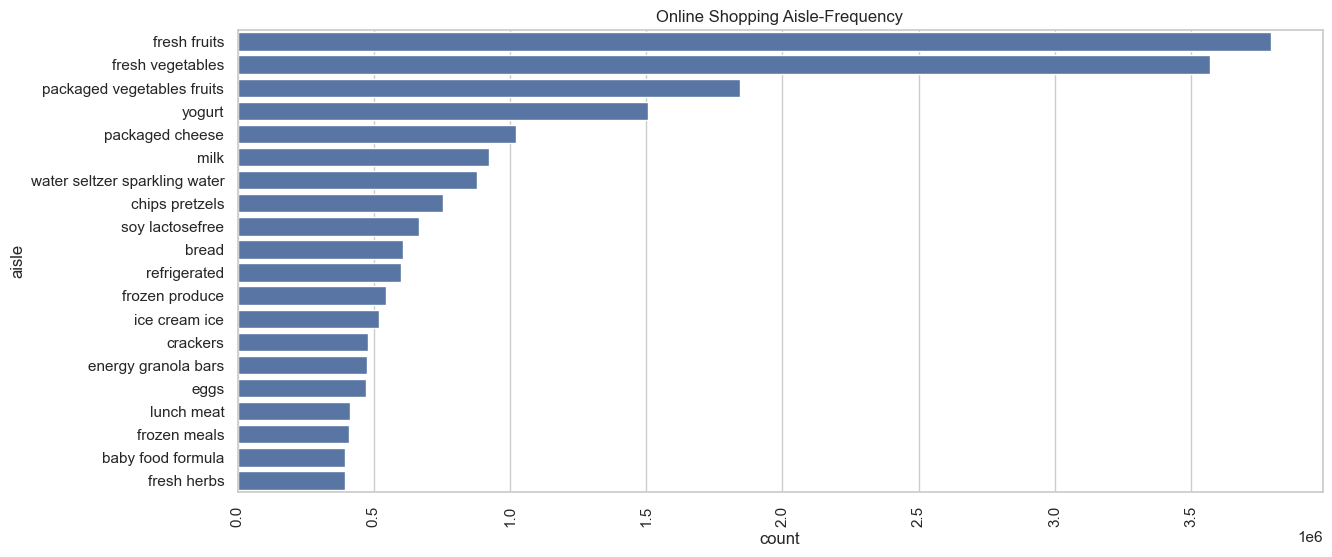

In [18]:
sns.countplot(data.aisle, order=data.aisle.value_counts().index[:20])
plt.title('Online Shopping Aisle-Frequency')
plt.xticks(rotation=90)
plt.show()

/var/folders/pz/t9j_q2x93rv3mt3ht397_3hh0000gn/T/ipykernel_23005/2104725611.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.department, order=data.department.value_counts().index, palette='viridis')


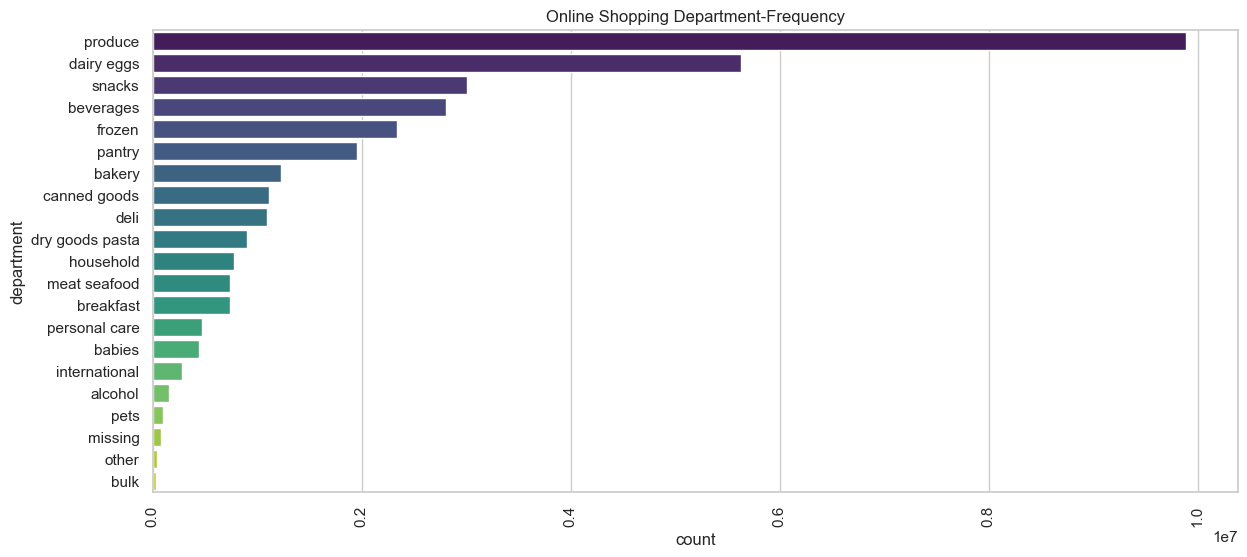

In [19]:
sns.countplot(data.department, order=data.department.value_counts().index, palette='viridis')
plt.title('Online Shopping Department-Frequency')
plt.xticks(rotation=90)
plt.show()

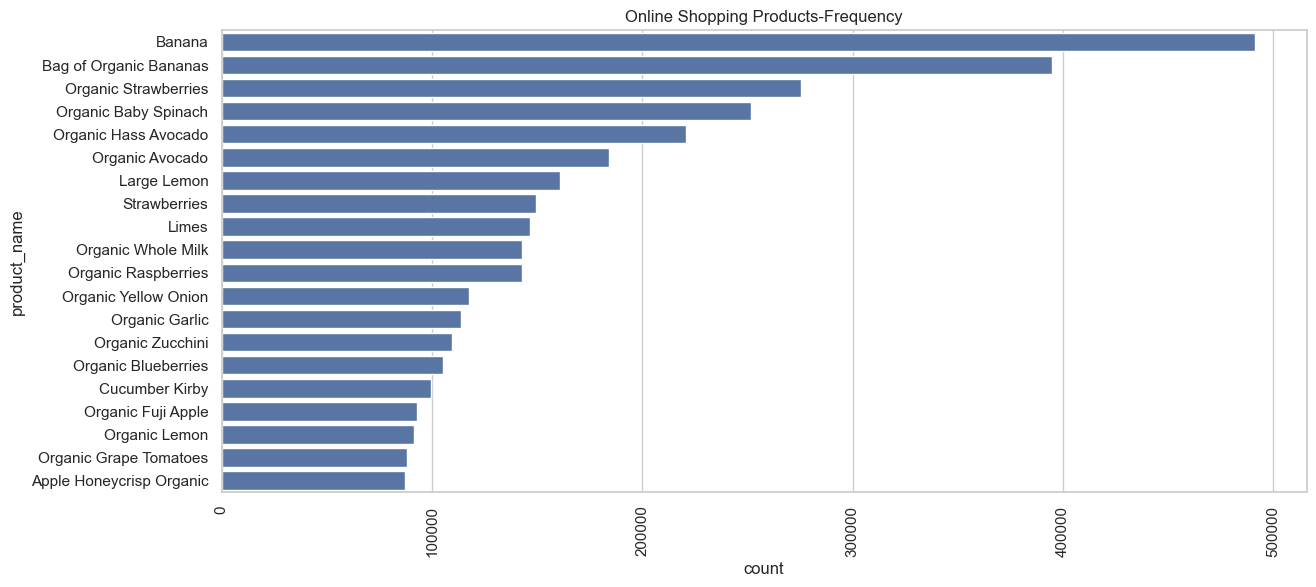

In [20]:
sns.countplot(data.product_name, order=data.product_name.value_counts().index[:20])
plt.title('Online Shopping Products-Frequency')
plt.xticks(rotation=90)
plt.show()

In [21]:
# check if user wants to discover data by department or aisle

In [22]:
if len(list_department_id) > 0:
    data = data[data['department_id'].isin(list_department_id)]
elif len(list_aisle_id) > 0:
    data = data[data['aisle_id'].isin(list_aisle_id)]
else:
    data = data

In [23]:
data.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
5,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
6,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,train,4,4,10,9.0
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,specialty cheeses,dairy eggs,79431,train,23,6,18,30.0
10,36,49235,3,0,Organic Half & Half,53,16,cream,dairy eggs,79431,train,23,6,18,30.0
11,36,43086,4,1,Super Greens Salad,123,4,packaged vegetables fruits,produce,79431,train,23,6,18,30.0


In [24]:
# only need order_id and product_name for discovering

In [25]:
data_explore = data[['order_id', 'product_name']]

In [26]:
df_products_number = (
    data_explore.groupby("product_name")["product_name"]
    .size()
    .reset_index(name="total_order")
)

In [27]:
df_products_number.describe()

,total_order
count,7159.000000
mean,2204.352563
std,12370.621100
min,1.000000
25%,28.000000
50%,125.000000
75%,667.500000
max,491291.000000


In [28]:
df_products_number.isna().sum()

product_name    0
total_order     0
dtype: int64

In [29]:
total_order = data_explore["order_id"].nunique()

In [30]:
# count how many different orders in the dataset

In [31]:
print(total_order)

2969231


In [32]:
data_explore.head(10)

,order_id,product_name
0,1,Bulgarian Yogurt
1,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,Organic Celery Hearts
3,1,Cucumber Kirby
5,1,Bag of Organic Bananas
6,1,Organic Hass Avocado
7,1,Organic Whole String Cheese
8,36,Grated Pecorino Romano Cheese
10,36,Organic Half & Half
11,36,Super Greens Salad


In [33]:
#convert dataframe to list type

In [34]:
basket = data_explore.groupby('order_id')['product_name'].apply(list).tolist()

In [35]:
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df = pd.DataFrame(te_ary, columns=te.columns_)

## Processing the data

In [36]:
# only choosing the product/group of products that appear at least 0.3% in the total orders

In [37]:
support_point = 0.003

In [38]:
frequent_itemsets = fpgrowth(df, min_support = support_point, use_colnames=True, max_len = max_len)

In [39]:
frequent_itemsets.head()

,support,itemsets
0,0.133008,(Bag of Organic Bananas)
1,0.074389,(Organic Hass Avocado)
2,0.033587,(Cucumber Kirby)
3,0.020769,(Organic Whole String Cheese)
4,0.008382,(Organic Celery Hearts)


In [40]:
# only choosing the results that have lift point higher than 1.5

In [41]:
rules = association_rules(
    frequent_itemsets,
    metric = "lift",
    min_threshold = 1.5
)

In [42]:
rules = rules.sort_values(by = ["lift", "support"], ascending=False)

In [43]:
rules = rules[["antecedents", "consequents", "support", "confidence", "lift"]]

In [44]:
rules.head(20)

,antecedents,consequents,support,confidence,lift
461,(Total 2% Lowfat Greek Strained Yogurt With Bl...,(Total 2% with Strawberry Lowfat Greek Straine...,0.003221,0.446858,42.986628
460,(Total 2% with Strawberry Lowfat Greek Straine...,(Total 2% Lowfat Greek Strained Yogurt With Bl...,0.003221,0.309888,42.986628
222,(Bunched Cilantro),(Limes),0.004395,0.275005,5.567668
223,(Limes),(Bunched Cilantro),0.004395,0.088974,5.567668
331,(Limes),(Jalapeno Peppers),0.004021,0.081413,5.437098
330,(Jalapeno Peppers),(Limes),0.004021,0.268556,5.437098
54,(Organic Ginger Root),(Organic Garlic),0.003784,0.207713,5.413095
55,(Organic Garlic),(Organic Ginger Root),0.003784,0.098617,5.413095
140,(Organic Red Onion),(Organic Cilantro),0.003054,0.128086,5.206254
141,(Organic Cilantro),(Organic Red Onion),0.003054,0.124148,5.206254


In [45]:
df_product_check = products.merge(departments, on = "department_id", how = "left")

In [46]:
df_product_check = df_product_check.merge(aisles, on = "aisle_id", how = "left")

In [47]:
df_product_check.head(20)

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
5,6,Dry Nose Oil,11,11,personal care,cold flu allergy
6,7,Pure Coconut Water With Orange,98,7,beverages,juice nectars
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen,frozen produce
8,9,Light Strawberry Blueberry Yogurt,120,16,dairy eggs,yogurt
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,beverages,water seltzer sparkling water


In [48]:
product_check = products.merge(aisles, on = "aisle_id", how = "left")

In [49]:
product_check = product_check.merge(departments, on = "department_id", how = "left")

In [50]:
#Conversion rate estimated

In [51]:
def identify_source_antecedents(food_name):
    source_list = []
    for item in food_name :
        filtered_data = product_check[product_check["product_name"] == item]
        source_list.append(filtered_data["department"].iloc[0])
    return source_list

In [52]:
def identify_source_consequents(food_name):
    source_list = []
    for item in food_name :
        filtered_data = product_check[product_check["product_name"] == item]
        source_list.append(filtered_data["department"].iloc[0])
    return source_list

In [53]:
rules["Source_of_antecedents"] = [identify_source_antecedents(rules.iloc[_, 1]) for _ in range(len(rules))]

In [54]:
rules["Source_of_consequents"] = [identify_source_consequents(rules.iloc[_, 1]) for _ in range(len(rules))]

In [55]:
rules = rules[["antecedents", "Source_of_antecedents", "consequents", "Source_of_consequents", "support", "confidence", "lift"]]

In [57]:
# return top 20 strong relationship product bundles

In [58]:
rules.head(20)

,antecedents,Source_of_antecedents,consequents,Source_of_consequents,support,confidence,lift
461,(Total 2% Lowfat Greek Strained Yogurt With Bl...,[dairy eggs],(Total 2% with Strawberry Lowfat Greek Straine...,[dairy eggs],0.003221,0.446858,42.986628
460,(Total 2% with Strawberry Lowfat Greek Straine...,[dairy eggs],(Total 2% Lowfat Greek Strained Yogurt With Bl...,[dairy eggs],0.003221,0.309888,42.986628
222,(Bunched Cilantro),[produce],(Limes),[produce],0.004395,0.275005,5.567668
223,(Limes),[produce],(Bunched Cilantro),[produce],0.004395,0.088974,5.567668
331,(Limes),[produce],(Jalapeno Peppers),[produce],0.004021,0.081413,5.437098
330,(Jalapeno Peppers),[produce],(Limes),[produce],0.004021,0.268556,5.437098
54,(Organic Ginger Root),[produce],(Organic Garlic),[produce],0.003784,0.207713,5.413095
55,(Organic Garlic),[produce],(Organic Ginger Root),[produce],0.003784,0.098617,5.413095
140,(Organic Red Onion),[produce],(Organic Cilantro),[produce],0.003054,0.128086,5.206254
141,(Organic Cilantro),[produce],(Organic Red Onion),[produce],0.003054,0.124148,5.206254
